#### Breast Cancer Wisconsin (Original) Dataset - UCI : wisc_bc_data.csv
The following project will normalize data  and compare the result betwwen the below algorithms.
>(1) Nearest Neighbors [kNN, k = sqrt(number of training data)]<br>
(2) Naive Bayes [GaussianNB]<br>
(3) SVM<br>
(4) Logistic Regression<br>
(5) Random Forests<br>
(6) Neural Networks [MLPClassifier]<br>

And I will print the following result
>(a) Accuracy score for [80% training data & 20% testing data]<br>
(b) Confusion Matrix for [80% training data & 20% testing data]<br>
(c) Cross-Validation Results for [cv = 5]<br>
(d) Leave-One-Out cross-validation result<br>

In [35]:
#load the modules
import math
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# output
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import LeaveOneOut
import seaborn as sns

In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\E2118\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [23]:
#load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/wisc_bc_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### note
* standardization -> [0,1] 
* normalization -> mean=0, sigma=1

In [39]:
accuracy={'algorithm':['KNN','Naive Bayes','SVM','Logistic regressinon','Random forest','Neural Networks'],
          'normalized':[],'standardized':[]}

In [45]:
def normalize(df):
    minMaxScaler = preprocessing.MinMaxScaler()
    scaled = minMaxScaler.fit_transform(df.drop(['diagnosis','id'],axis=1))
    df.loc[:,'radius_mean':'fractal_dimension_worst'] = pd.DataFrame(scaled).values
    #pd.dataframe can convert the data by object and assiagn in the behind()
    return df

In [48]:
def standardize(df):
    standardScaler = preprocessing.StandardScaler()
    scaled = standardScaler.fit_transform(df.drop(df['diagnosis','id'],axis=1))
    df.loc[:,'radius_mean':'fractal_dimension_worst']=df.DataFrame(scaled).values
    return df

In [49]:
def output(name, preprocessing, model, X_train,X_test, Y_train, Y_test, X, Y):
    global accuracy
    print(preprocessing)
    model.fit(X_train,Y_train.values.ravel())
    #why Y_train should always be flattern
    #it is from keras
    y_predict=model.predict(X_test)
    accuracyScore = accuracy_score(Y_test, y_predict.ravel())
    accuracy[preprocessing].append(accuracyScore)
    print('【',name,' - ',preprocessing,'】\n')
    print('\n#Accuracy Score\n\n',accuracyScore)
    print('\n\n#Confusion Matrix\n\n',confusion_matrix(Y_test, y_predict.ravel()))
    print( '\n',sns.heatmap(confusion_matrix(Y_test, y_predict.ravel()), annot=True),'\n')
    print('\n\n#Cross-Validation Results\n\n',cross_val_score(model, X, Y.values.ravel(), cv=5))
    print('\n\n#Leave-One-Out cross-validation result\n\n',cross_val_score(model, X, Y.values.ravel(), cv=LeaveOneOut(len(X))))
    print('\n\n-----------------------------------\n\n')

### Algorithm chosen
* KNN: (https://www.youtube.com/watch?v=MDniRwXizWo&ab_channel=AugmentedStartups)
* Naive Bayes: 取出所有特徵在結果是1情形下的條件機率，若越接近一，則該特徵影響越大
* SVM : Suitable for extreme cases 像是辨認狗或貓 (https://youtu.be/Y6RRHw9uN9o)
    * use kernel to boost analysis
    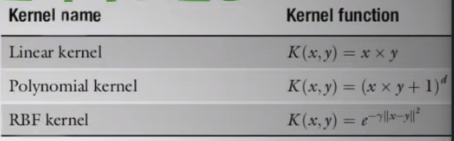<br>

In [50]:
def run(df,preprocessing):
    #DEFINE FEATURE AND TARGET
    X = df.drop(['id','diagnosis'],axis=1)
    Y = df[['diagnosis']]

    #SPLIT INTO TRAIN AND TEST DATASET
    #THIS MODULE IS FROM SKLEARN
    #IF random_state=0, everytime we get different split of train test variables
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

    #(1) Nearest Neighbors [kNN, k = sqrt(number of training data)]
    # math.floor(math.sqrt(X_train.shape[0])) => X'S SIZE WILL BE TAKEN SQUARE ROOT AND Decimal WILL BE DISCARDEDE
    KNN = KNeighborsClassifier(n_neighbors=math.floor(math.sqrt(X_train.shape[0])))
    #WHT WE CHOOSE THIS NEIGHBOR NUMBER
    output('Nearest Neighbors',preprocessing,KNN, X_train, X_test, Y_train, Y_test, X, Y)

    #(2) Naive Bayes [GaussianNB]
    #JUST MUPLTIPLY EVERY SINGLE FEATURES PROBALBILITY AND SEE THE RESULT
    #取出所有特徵在結果是1情形下的條件機率，若越接近一，則該特徵影響越大
    naive_bayes = GaussianNB()
    output('Naive Bayes',preprocessing,naive_bayes, X_train, X_test, Y_train, Y_test, X, Y)

    #(3) SVM
    SVM = SVC()
    output('SVM',preprocessing, SVM, X_train, X_test, Y_train, Y_test, X, Y)

    #(4) Logistic Regression
    logistic_regression = LogisticRegression(random_state=0, solver='lbfgs')
    output('Logistic Regression',preprocessing,logistic_regression, X_train, X_test, Y_train, Y_test, X, Y)

    #(5) Random Forests
    random_forest = RandomForestClassifier(n_estimators=100)
    output('Random Forests',preprocessing,random_forest, X_train, X_test, Y_train, Y_test, X, Y)

    #(6) Neural Networks [MLPClassifier]
    neural_networks = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 5), random_state=1)
    output('Neural Networks',preprocessing,neural_networks, X_train, X_test, Y_train, Y_test, X, Y)

# Standardization and normalization

normalized
【 Nearest Neighbors  -  normalized 】


#Accuracy Score

 0.9912280701754386


#Confusion Matrix

 [[80  0]
 [ 1 33]]

 AxesSubplot(0.125,0.125;0.62x0.755) 



#Cross-Validation Results

 [0.93043478 0.95652174 0.97345133 0.94690265 0.97345133]


#Leave-One-Out cross-validation result

 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

【 Random Forests  -  normalized 】


#Accuracy Score

 0.9210526315789473


#Confusion Matrix

 [[72  8]
 [ 1 33]]

 AxesSubplot(0.125,0.125;0.253952x0.755) 



#Cross-Validation Results

 [0.93913043 0.95652174 0.99115044 0.97345133 0.99115044]


#Leave-One-Out cross-validation result

 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

KeyError: ('diagnosis', 'id')

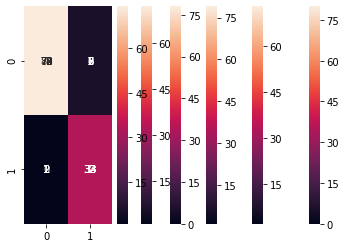

In [51]:
df_normalized = normalize(df)
run(df_normalized, 'normalized')
df_standardized = standardize(df)
run(df_standardized, 'standardized')